In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("twitter_new.csv",encoding="ISO-8859-1",names=["target","ids","date","flag","username","text"])
df1=df.groupby('target').head(500000).reset_index(drop=True) # here the data is very large to run, so I use groupby function to get 5 lakhs data in each group in target.
df1.head()

,target,ids,date,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df1.isnull().sum()

target      0
ids         0
date        0
flag        0
username    0
text        0
dtype: int64

In [5]:
df1.shape

(1000000, 6)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1000000 non-null  int64 
 1   ids       1000000 non-null  int64 
 2   date      1000000 non-null  object
 3   flag      1000000 non-null  object
 4   username  1000000 non-null  object
 5   text      1000000 non-null  object
dtypes: int64(2), object(4)
memory usage: 45.8+ MB


In [8]:
df1['target'].value_counts()

0    500000
4    500000
Name: target, dtype: int64

# 0 --> Negative
# 4 --> Positive

# Here Target Variable is Categorically Seperated by two types, So I Used Logistic Regression.. 

In [15]:
df2=df1.tail()

In [16]:
df2.head()

,target,ids,date,flag,username,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# Data preprocessing - to clean the data 

In [9]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Before Fit the model we need to transform the data into vectorized data, so here i use TFIDF Vectorization Technique.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english',ngram_range = (1,3))
text_counts = cv.fit_transform(df1["text"])

# Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df1["target"], test_size=0.3, random_state=8)

In [11]:
X_train

<700000x8361621 sparse matrix of type '<class 'numpy.float64'>'
	with 12758780 stored elements in Compressed Sparse Row format>

In [12]:
Y_train

607322    4
581257    4
184360    0
696209    4
695560    4
         ..
231557    0
780649    4
149489    0
550228    4
594371    4
Name: target, Length: 700000, dtype: int64

In [13]:
print(text_counts)

  (0, 2594664)	0.2153357331402719
  (0, 4422870)	0.2153357331402719
  (0, 9841951)	0.2153357331402719
  (0, 1587630)	0.2153357331402719
  (0, 903825)	0.2153357331402719
  (0, 116723)	0.2153357331402719
  (0, 2100023)	0.2153357331402719
  (0, 11525278)	0.2153357331402719
  (0, 5229595)	0.0796749334337179
  (0, 10632336)	0.20935239112743095
  (0, 1743968)	0.2153357331402719
  (0, 2594663)	0.2153357331402719
  (0, 4422868)	0.1948785516783336
  (0, 9841948)	0.18662044860597285
  (0, 1587629)	0.2153357331402719
  (0, 903820)	0.1948785516783336
  (0, 116722)	0.2153357331402719
  (0, 2100022)	0.2153357331402719
  (0, 11525148)	0.07956127571235543
  (0, 5229594)	0.07967418281762256
  (0, 10632335)	0.20935239112743095
  (0, 2605461)	0.05854714256347226
  (0, 1743943)	0.16071659289600057
  (0, 2594150)	0.11089495487625388
  (0, 4411003)	0.06334040716338382
  :	:
  (1599998, 11103707)	0.22917799298567543
  (1599998, 4740909)	0.2209260161340632
  (1599998, 135197)	0.2114307955993145
  (1599998, 97

In [13]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(X_train,Y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=regression.predict(X_test)
y_pred

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.ylabel("Predicted")
plt.xlabel("Actual")
confusion_matrix(y_test,y_pred)

In [17]:
from sklearn.metrics import accuracy_score,f1_score,plot_roc_curve
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))


Accuracy Score :  0.7836966666666667


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


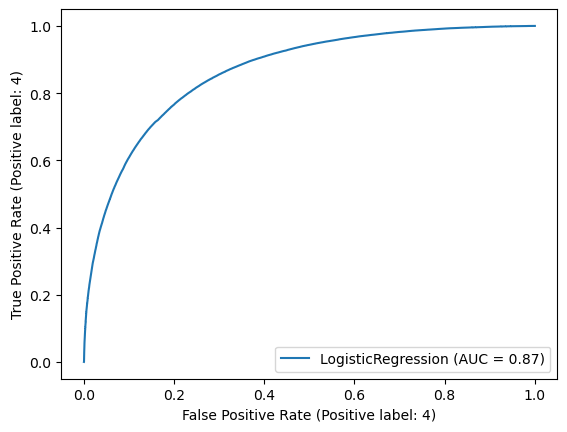

In [19]:
regression.score(X_test,Y_test)
plot_roc_curve(regression, X_test, Y_test)